In [2]:
import os

In [3]:
os.getcwd()

'/Users/siamaktalebi/Downloads/MachineLearning_Projects'

In [5]:
# Change the current working directory
os.chdir('/Users/siamaktalebi/Downloads/MachineLearning_Projects')

In [4]:
os.getcwd()

'/Users/siamaktalebi/Downloads/MachineLearning_Projects'

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Model functions
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor

# Statistics functions
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Functions to calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Function to split data into different groups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

# Function to deal with missing values via imputation
from sklearn.impute import SimpleImputer

# Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("AmesHousing.csv")

In [8]:
df.shape

(2930, 82)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Null Values

In [10]:
nullv=(df.isnull().sum())/df.shape[0]
nullvplot = nullv[nullv > 0].sort_values(ascending = False)

Text(0, 0.5, 'Features')

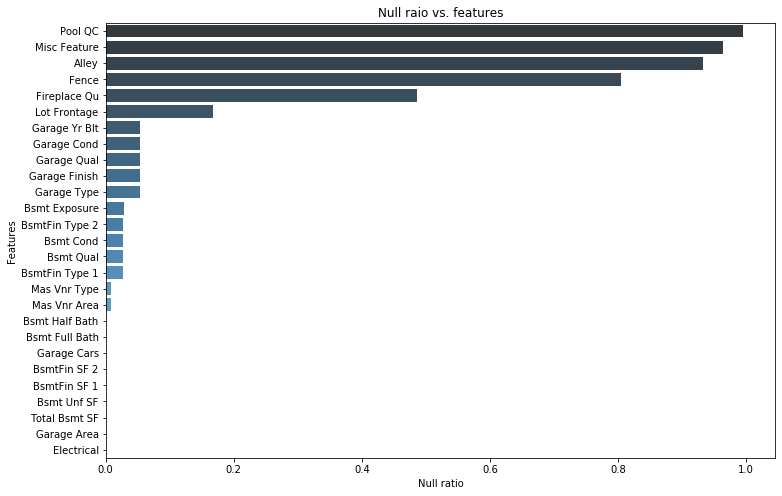

In [11]:
nplot=pd.DataFrame({'Features':nullvplot.index, 'Null ratio':nullvplot.values})
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x="Null ratio", y="Features", data=nplot,palette="Blues_d")
#ax.legend(loc = 'lower right')
#plt.legend(loc=1)
plt.title(r'Null raio vs. features')
plt.xlabel(r'Null ratio')
plt.ylabel(r'Features')


In [12]:
data_num = df.select_dtypes(include=[np.number])

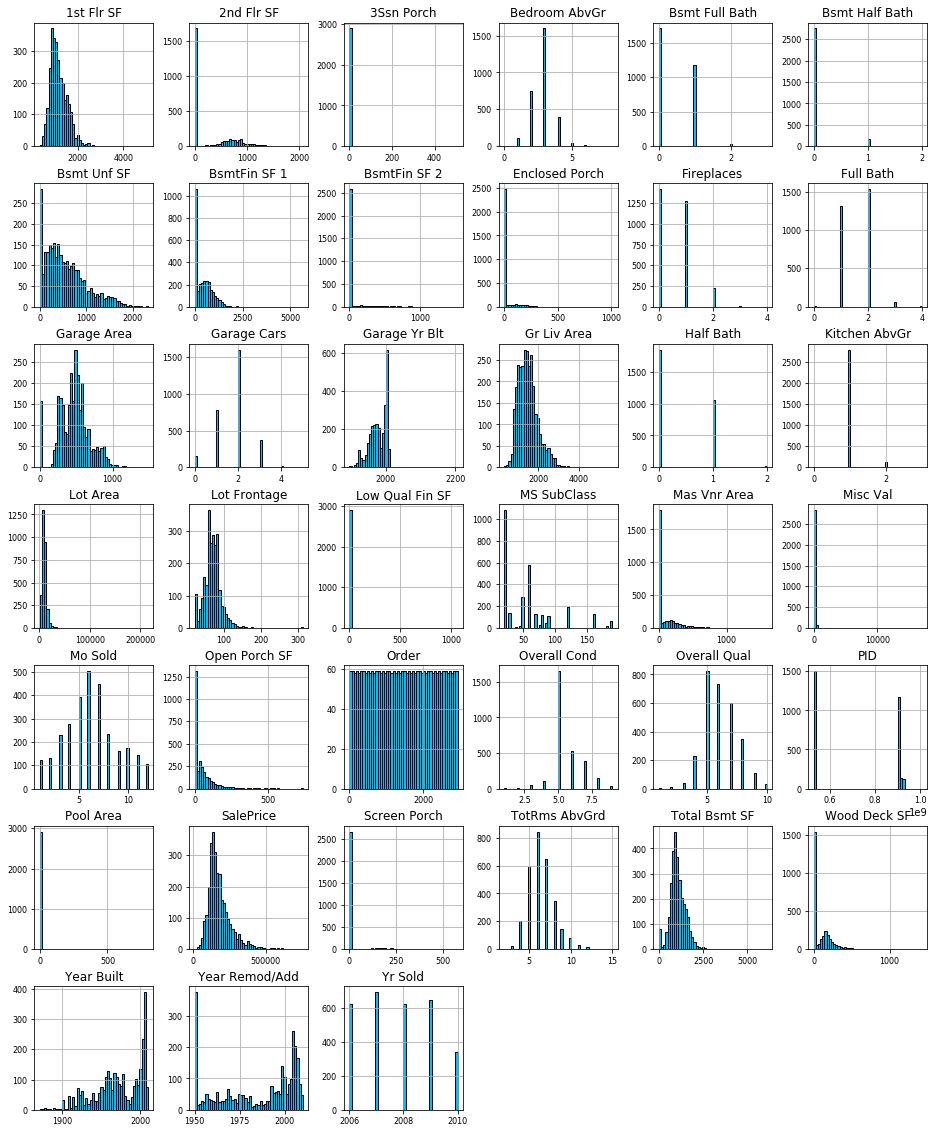

In [13]:
fig_ = data_num.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

In [14]:
data_num.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
sel = VarianceThreshold(threshold=0.05)
sel.fit(data_num.iloc[:, :-1])

VarianceThreshold(threshold=0.05)

In [16]:
print(f"Number of retained features: {sum(sel.get_support())}")

Number of retained features: 37


In [17]:
print(sel.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [18]:
print(f"\nNumber of quasi_constant features: {len(data_num.iloc[:, :-1].columns) - sum(sel.get_support())}")


Number of quasi_constant features: 1


In [19]:
quasi_constant_features_list = [x for x in data_num.iloc[:, :-1].columns if x not in data_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")



Quasi-constant features to be dropped: ['Kitchen AbvGr']


In [20]:
# Drop quasi-constant features from both datasets
data_num.drop(quasi_constant_features_list, axis=1, inplace=True)


In [21]:
abs_corr_coeffs = data_num.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2       0.005891
Misc Val           0.015691
Yr Sold            0.030569
Order              0.031408
3Ssn Porch         0.032225
Mo Sold            0.035259
Bsmt Half Bath     0.035835
Low Qual Fin SF    0.037660
Pool Area          0.068403
MS SubClass        0.085092
Overall Cond       0.101697
Screen Porch       0.112151
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
PID                0.246521
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

In [22]:
coffplot=pd.DataFrame({'Features':abs_corr_coeffs.index, 'Corr':abs_corr_coeffs.values})

Text(0, 0.5, 'Features')

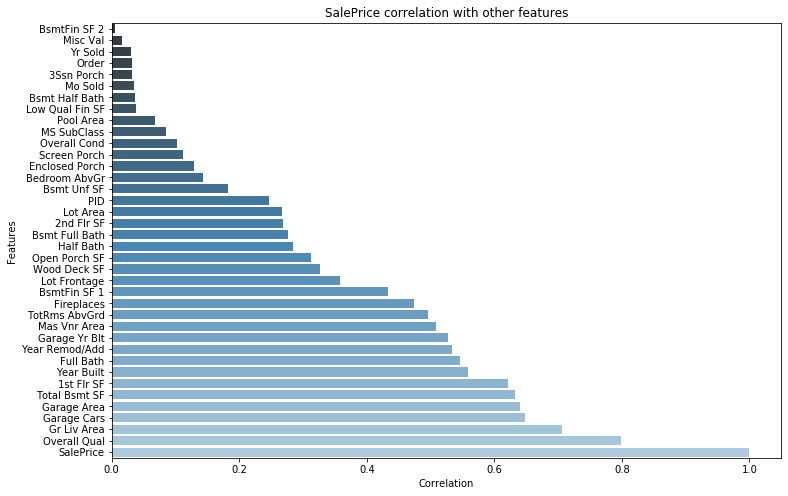

In [23]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x="Corr", y="Features", data=coffplot,palette="Blues_d")
#ax.legend(loc = 'lower right')
#plt.legend(loc=1)
plt.title(r'SalePrice correlation with other features')
plt.xlabel(r'Correlation')
plt.ylabel(r'Features')

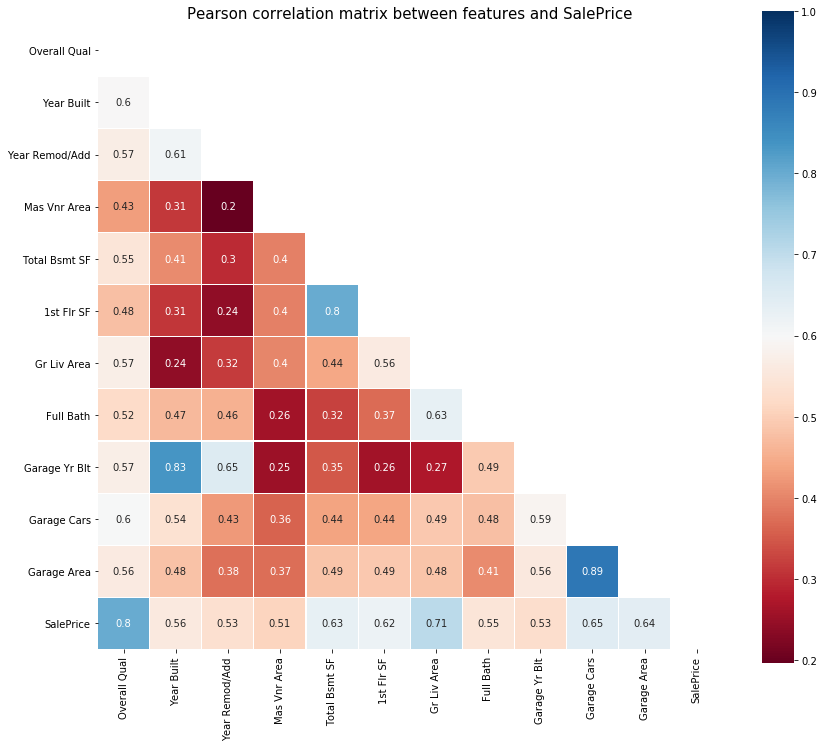

In [24]:
corr_data = data_num.corr()
highest_corr_features = corr_data.index[abs(corr_data['SalePrice']) > 0.5]

mask = np.triu(np.ones_like(highest_corr_features, dtype=bool))

plt.figure(figsize=(14,12))
plt.title('Pearson correlation matrix between features and SalePrice', y=1, size=15)
sns.heatmap(data_num[highest_corr_features].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True,
            cmap='RdBu',
            linecolor='white',
            annot=True,
           mask = mask)
plt.show()

# Missing Values

In [25]:
df = df.drop(['Garage Cars','Garage Yr Blt'],axis = 1)

In [26]:
# Get names of columns with missing values (training set)
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

print("Columns with missing (NA) values:")
print(cols_with_missing)

Columns with missing (NA) values:
['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


In [27]:
# Count how many NA values are in each of those columns
cols_nan_count = list(map(lambda col: df[col].isna().sum()*100/len(df), cols_with_missing))


tab = pd.DataFrame(cols_with_missing, columns=["Column"])
tab["Percent_NaN"] = cols_nan_count
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)

In [28]:
tab

,Column,Percent_NaN
22,Pool QC,99.556314
24,Misc Feature,96.382253
1,Alley,93.242321
23,Fence,80.477816
16,Fireplace Qu,48.532423
0,Lot Frontage,16.723549
21,Garage Cond,5.426621
20,Garage Qual,5.426621
18,Garage Finish,5.426621
17,Garage Type,5.358362


Text(0, 0.5, 'Column Name\n')

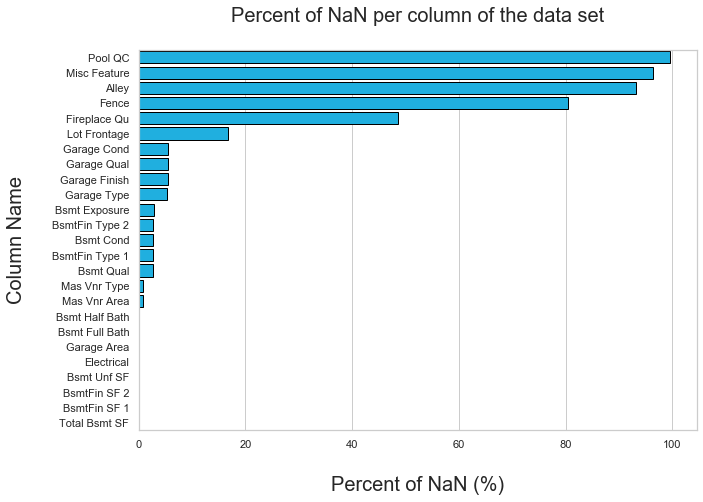

In [98]:



# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the data set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [30]:
df.shape

(2930, 80)

In [31]:
df.drop(tab[tab['Percent_NaN']> 80].Column,1, inplace = True)

In [32]:
df.shape

(2930, 76)

In [33]:
df['Fireplace Qu'].unique()

array(['Gd', nan, 'TA', 'Po', 'Ex', 'Fa'], dtype=object)

In [34]:
df['Fireplace Qu'].fillna('None', inplace = True)

In [35]:
df_copy = df.copy()
cols_missing_value = df_copy.columns[df_copy.isna().sum()>0].values
missing_num_att = df_copy[cols_missing_value].select_dtypes(exclude='object').columns
for att in missing_num_att:
    df_copy[att].fillna(df_copy[att].median(), inplace=True)

In [36]:
missing_num_att

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Area'],
      dtype='object')

In [37]:
missing_cat_att = df_copy[cols_missing_value].select_dtypes(include='object').columns
for att in missing_cat_att:
    nbd_dict = df_copy.groupby('Neighborhood')[att].apply(lambda x: x.mode().iloc[0])
    full_sample_dict = df_copy[att].mode()[0]
    df_copy[att].fillna(nbd_dict, inplace=True)
    df_copy[att].fillna(full_sample_dict, inplace=True)

In [38]:
missing_cat_att

Index(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [40]:
df_impute = df_copy.copy()

In [41]:
total_missing = df_impute.isna().sum().sum()
print(f"Total number of NAs: {total_missing}")

Total number of NAs: 0


In [42]:
df_impute.shape

(2930, 76)

In [43]:
for n in df_impute.select_dtypes(exclude=[np.number]).columns:
    print('############## for column: {0}'.format(n))
    print(df_impute[n].value_counts(normalize = True).mul(100).round(1))

############## for column: MS Zoning
RL         77.6
RM         15.8
FV          4.7
RH          0.9
C (all)     0.9
A (agr)     0.1
I (all)     0.1
Name: MS Zoning, dtype: float64
############## for column: Street
Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
############## for column: Lot Shape
Reg    63.4
IR1    33.4
IR2     2.6
IR3     0.5
Name: Lot Shape, dtype: float64
############## for column: Land Contour
Lvl    89.9
HLS     4.1
Bnk     4.0
Low     2.0
Name: Land Contour, dtype: float64
############## for column: Utilities
AllPub    99.9
NoSewr     0.1
NoSeWa     0.0
Name: Utilities, dtype: float64
############## for column: Lot Config
Inside     73.0
Corner     17.4
CulDSac     6.1
FR2         2.9
FR3         0.5
Name: Lot Config, dtype: float64
############## for column: Land Slope
Gtl    95.2
Mod     4.3
Sev     0.5
Name: Land Slope, dtype: float64
############## for column: Neighborhood
NAmes      15.1
CollgCr     9.1
OldTown     8.2
Edwards     6.6
Somerst     6.

In [44]:

drop_cat_att = [
    'Street',
    'Land Contour',
    'Utilities',
    'Land Slope',
    'Condition 2',
    'Roof Matl',
    'Bsmt Cond',
    'BsmtFin Type 2',
    'Heating',
    'Central Air',
    'Electrical',
    'Functional',
    'Garage Qual',
    'Garage Cond',
    'Paved Drive'
]


df_impute.drop(drop_cat_att,1, inplace = True)


In [45]:
df_impute.shape

(2930, 61)

In [46]:
num_att = list(df_impute.select_dtypes(include=[np.number]).columns[:-1])

In [47]:
num_att

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [98]:
df_impute.select_dtypes(exclude=[np.number]).columns

Index(['MS Zoning', 'Lot Shape', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1',
       'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [48]:
ordinal_att = ['Lot Shape',
               'Exter Cond','Bsmt Qual',
               'Bsmt Exposure', 'BsmtFin Type 1', 
               'Heating QC', 'Kitchen Qual',
               'Fireplace Qu', 'Garage Finish']

In [49]:
cat_att = []
for n in df_impute.select_dtypes(exclude=[np.number]).columns:
    if n not in ordinal_att:
        cat_att.append(n)
    


In [50]:
cat_att


['MS Zoning',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Foundation',
 'Garage Type',
 'Sale Type',
 'Sale Condition']

In [51]:
features = cat_att + ordinal_att + num_att

In [52]:
# Check all features are accounted for
assert len(features) - len(df_impute.drop('SalePrice', axis=1).columns) == 0

# Encoding ordinal attributes

In [53]:
ordinal_att

['Lot Shape',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Finish']

In [56]:
data = df_impute.copy()

In [57]:
# GarageFinish
GarageFinish_dict = {'Unf':1,'RFn': 2, 'Fin':3, 'None':0}
data['Garage Finish'] = data['Garage Finish'].replace(GarageFinish_dict)


# LotShape
LotShape_dict = {'IR3': 1, 'IR2':2, 'IR1':3, 'Reg':4}
data['Lot Shape'] = data['Lot Shape'].replace(LotShape_dict)

# BsmtExposure
BsmtExposure_dict = {'No':1, 'Mn':2, 'Av':3, 'Gd': 4, 'None':0}
data['Bsmt Exposure'] = data['Bsmt Exposure'].replace(BsmtExposure_dict)

# BsmtFinType
BsmtFinType = ['BsmtFin Type 1']
BsmtFinType_dict = {'Unf':1, 'LwQ': 2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ': 6, 'None':0}
data[BsmtFinType] = data[BsmtFinType].replace(BsmtFinType_dict)

# Quality/condition features
QC = [ 'Exter Cond',
      'Bsmt Qual', 
      'Heating QC', 
      'Kitchen Qual',
      'Fireplace Qu'
      ]
QC_dict = {'Po':1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}
data[QC] = data[QC].replace(QC_dict)



# Adding new features

Not sure yet


In [59]:
df_copy = data.copy()

In [60]:
# Convert Year of construction to the Age of the house since the construction
df_copy["AgeSinceConst"] = (df_copy["Year Built"].max() - df_copy["Year Built"])
df_copy["AgeSinceRemod"] = (df_copy["Year Remod/Add"].max() - df_copy["Year Remod/Add"])


# Drop "YearBuilt"
df_copy.drop(["Year Built"], axis=1, inplace=True)
df_copy.drop(["Year Remod/Add"], axis=1, inplace=True)
num_att.remove("Year Built")
num_att.remove("Year Remod/Add")

In [68]:
df_copy[num_att+ordinal_att]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Lot Shape,Exter Cond,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,Heating QC,Kitchen Qual,Fireplace Qu,Garage Finish
0,1,526301100,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,528.0,210,62,0,0,0,0,0,5,2010,3,3,3,4,4,2,3,4,3
1,2,526350040,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,730.0,140,0,0,0,120,0,0,6,2010,4,3,3,1,3,3,3,0,1
2,3,526351010,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,312.0,393,36,0,0,0,0,12500,6,2010,3,3,3,1,5,3,4,0,1
3,4,526353030,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,522.0,0,0,0,0,0,0,0,4,2010,4,3,3,1,5,5,5,3,3
4,5,527105010,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,482.0,212,34,0,0,0,0,0,3,2010,3,3,4,1,6,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,588.0,120,0,0,0,0,0,0,3,2006,3,3,3,3,6,3,3,0,1
2926,2927,923276100,20,68.0,8885,5,5,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,484.0,164,0,0,0,0,0,0,6,2006,3,3,4,3,4,3,3,0,1
2927,2928,923400125,85,62.0,10441,5,5,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,80,32,0,0,0,0,700,7,2006,4,3,4,3,6,3,3,0,1
2928,2929,924100070,20,77.0,10010,5,5,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,418.0,240,38,0,0,0,0,0,4,2006,4,3,4,3,5,4,3,3,2


## Helping with skew

In [69]:
continuous_features = ordinal_att + num_att

In [71]:
df_copy1 = df_copy.copy()

In [70]:
continuous_features

['Lot Shape',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Finish',
 'Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [72]:
data_skew_verify = df_copy1.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(data_skew_verify[i].skew()))

data_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})

sk_features = data_skewed[data_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['Lot Shape', 'Exter Cond', 'Bsmt Exposure', 'Heating QC', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']


In [73]:
# Log transformation of the skewed features
for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
    df_copy1[i] = np.log((df_copy1[i])+1)
    


In [74]:
# Log transformation of the target variable "SalePrice"
df_copy1["SalePriceLog"] = np.log(df_copy1.SalePrice)

# Drop the original SalePrice
df_copy1.drop(["SalePrice"], axis=1, inplace=True)


# Dummifying categorical variables

In [75]:
df_copy_cat = df_copy1[cat_att]

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
data_dummies = pd.get_dummies(df_copy_cat)
data_dummies.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [78]:
df_copy1[cat_att]

,MS Zoning,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Foundation,Garage Type,Sale Type,Sale Condition
0,RL,Corner,NAmes,Norm,1Fam,1Story,Hip,BrkFace,Plywood,Stone,TA,CBlock,Attchd,WD,Normal
1,RH,Inside,NAmes,Feedr,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,Attchd,WD,Normal
2,RL,Corner,NAmes,Norm,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,Attchd,WD,Normal
3,RL,Corner,NAmes,Norm,1Fam,1Story,Hip,BrkFace,BrkFace,None,Gd,CBlock,Attchd,WD,Normal
4,RL,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,CulDSac,Mitchel,Norm,1Fam,SLvl,Gable,HdBoard,HdBoard,None,TA,CBlock,Detchd,WD,Normal
2926,RL,Inside,Mitchel,Norm,1Fam,1Story,Gable,HdBoard,HdBoard,None,TA,CBlock,Attchd,WD,Normal
2927,RL,Inside,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,PConc,Attchd,WD,Normal
2928,RL,Inside,Mitchel,Norm,1Fam,1Story,Gable,HdBoard,HdBoard,None,TA,CBlock,Attchd,WD,Normal


In [79]:
df_copy2=df_copy1.copy().drop(cat_att, axis = 1)

In [81]:
# Join all dataset together
# Training set
data_new = pd.concat([df_copy2, data_dummies], axis = 1)

In [82]:
data_new.shape

(2930, 184)

# Modeling

In [83]:
# TRAINING DATASET
# Feature variables
X = data_new.copy().drop(["SalePriceLog"], axis = 1)

# Target Variable
y = data_new.loc[:, "SalePriceLog"]

print(X.shape)
print(y.shape)

(2930, 183)
(2930,)


In [84]:
# Split the data into Training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")


X_train:(2344, 183)
y_train:(2344,)

X_test:(586, 183)
y_test:(586,)


In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [86]:
# Define models
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()

In [87]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

- Regressor: Linear
R²: 0.935196187807348
RMSE: 0.10950228303030904



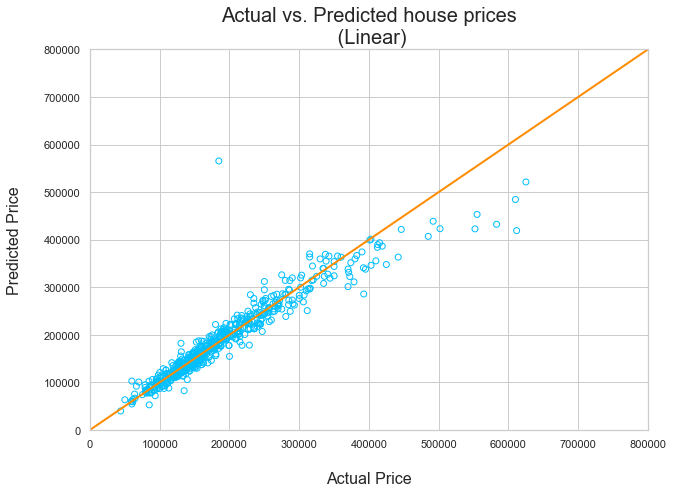

In [88]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

## Ridge

In [89]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

- Regressor: Ridge
R²: 0.9351956034436466
RMSE: 0.10950277674366486



### Tuning Hyperparameter

In [90]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.0s finished


Best hyperparameters: {'alpha': 9.696969696969697}
Best R² (train): 0.8956359729200647


In [91]:
model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

- Regressor: Ridge
R²: 0.9336690996416521
RMSE: 0.11078496957263852



## Lasso

In [92]:
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

- Regressor: Lasso
R²: 0.9312723703798356
RMSE: 0.11276870141954556



### Tuning Hyperparameter

In [93]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.2s finished


Best hyperparameters: {'alpha': 0.00041320124001153346}
Best R² (train): 0.8969818338761888


In [94]:
model_lasso_opt = Lasso(alpha = lasso_cv.best_params_["alpha"])

model_lasso_opt.fit(X_train, y_train)
y_pred_lasso_opt = model_lasso_opt.predict(X_test)
print_score(y_test, y_pred_lasso_opt, "Lasso")

- Regressor: Lasso
R²: 0.9348872381383727
RMSE: 0.10976299661450965



## Decision Tree

In [95]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print_score(y_test, y_pred_tree, "Decision Tree")

- Regressor: Decision Tree
R²: 0.8359812209695754
RMSE: 0.17420863741733753



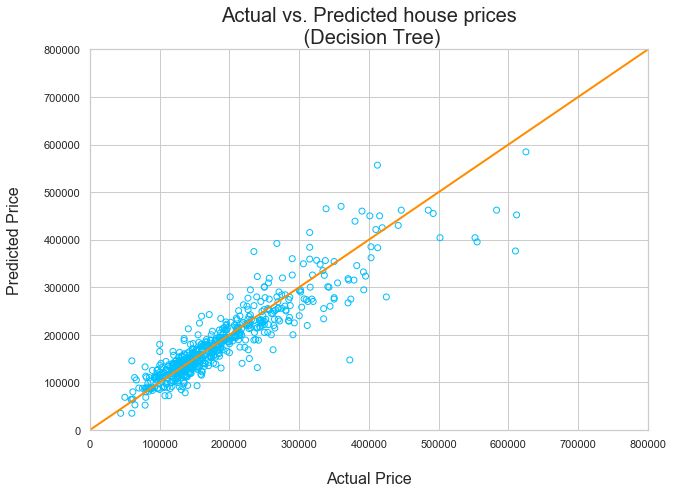

In [96]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Decision Tree)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_tree),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

## Random Forest

In [100]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

- Regressor: Random Forest
R²: 0.9233221549935043
RMSE: 0.11911263877873397

